In [21]:
import pandas as pd
import numpy as np

In [22]:
data=pd.read_csv("C:/Users/palla/Documents/Py files/datasets/top50.csv")
data.head()

#                       Track.Name    Artist.Name           Genre  \
0  1                         Señorita   Shawn Mendes    canadian pop   
1  2                            China       Anuel AA  reggaeton flow   
2  3    boyfriend (with Social House)  Ariana Grande       dance pop   
3  4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4  5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

In [23]:
#checking NA cells
data.isna().sum()

#                   0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [24]:
data['Genre'].value_counts()
#dance pop genre has the most songs in the list

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

In [25]:
len(data['Genre'].unique())
#Total genre present

21

New Table

In [26]:
data.columns

Index(['#', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

The Popularity graphs

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
plt.figure(figsize=(200, 50))
ax = sns.barplot(x=data['Genre'], y=data['Popularity'])

# Increase font size of values -- Google search
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points', fontsize=100)

plt.title('Genre vs Popularity', fontsize=200)
plt.xlabel('Genre', fontsize=150)
plt.ylabel('Popularity',fontsize=150)
plt.tick_params(axis='x', labelsize=100, rotation=75)  
plt.show()

In [29]:
plt.figure(figsize=(200, 50))
ax = sns.barplot(x=data['Artist.Name'], y=data['Popularity'])

# Increase font size of values -- Google search
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', xytext = (0, 20), textcoords = 'offset points', fontsize=100)

plt.title('Artist Name vs Popularity', fontsize=200)
plt.xlabel('Artist Name', fontsize=150)
plt.ylabel('Popularity',fontsize=150)
plt.tick_params(axis='x', labelsize=100, rotation=75)  
plt.show()

Heat Map

In [30]:
#Creating a new column for Loudness since the values were in negative
data['Loudness+']=-(data['Loudness..dB..'])
data['Loudness+'].unique()

array([ 6,  4,  8,  5, 11,  2,  7,  3,  9], dtype=int64)

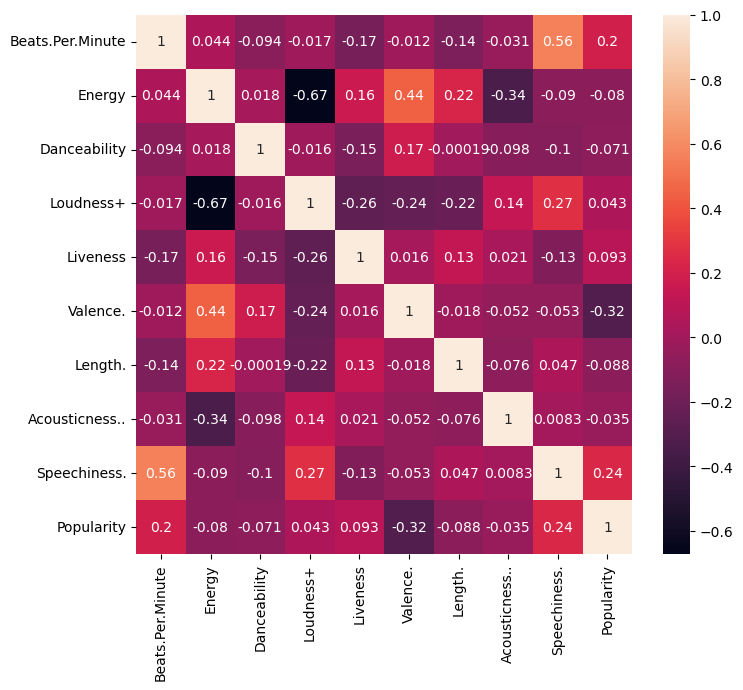

In [31]:
plt.subplots(figsize=(8, 7))
da1=data[['Beats.Per.Minute', 'Energy',
       'Danceability', 'Loudness+', 'Liveness', 'Valence.', 'Length.',
       'Acousticness..', 'Speechiness.', 'Popularity']]
sns.heatmap(da1.corr(), annot=True)
plt.show()

Beats Per Minute greatly correlates with Speechiness

Using KMeans clusterization with 10 clusters 

In [32]:
from sklearn.cluster import KMeans

num_types = [ 'int64', 'float64'] 
#This list cointains the data types which will be considered for clustering.
xy = data.select_dtypes(include=num_types) 
#Selects the columns from the dataset with the data types which are matching with the 'num_types' and places them in xy


km = KMeans(n_clusters=10)  #We'll have 10 distinct groups from the algorithm
k=km.fit_predict(xy)  #a cluster label is assigned to each data point
data['no']=k


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
data['no'].unique()

array([8, 3, 0, 4, 6, 2, 5, 9, 7, 1])

Recommendation System

In [34]:
from tqdm import tqdm

In [35]:
data['name']=data['Track.Name']


In [36]:
class SpotifyRecomm():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data
    
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
    
    def get_recomm(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col in np.arange(len(res_data.columns)):
                #indeces of non-numerical columns
                if not col in [0, 1, 2, 3, 16]:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        columns = ['Artist.Name', 'Track.Name']
        return res_data[columns][:amount]
    
    
recommender = SpotifyRecomm(data)

recommender.get_recomm('China', 5)

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 12583.94it/s]
C:\Users\palla\AppData\Local\Temp\ipykernel_2316\2852927154.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_data['distance'] = distances


Artist.Name                         Track.Name
22  Jhay Cortez               No Me Conoce - Remix
13         Sech                 Otro Trago - Remix
5    Ed Sheeran  I Don't Care (with Justin Bieber)
47   Marshmello                            Happier
23        Lunay                    Soltera - Remix

In [37]:
recommender.get_recomm('Señorita', 5)

100%|███████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 12702.94it/s]
C:\Users\palla\AppData\Local\Temp\ipykernel_2316\2852927154.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_data['distance'] = distances


Artist.Name                                         Track.Name
38  Jonas Brothers                                             Sucker
5       Ed Sheeran                  I Don't Care (with Justin Bieber)
41    Taylor Swift                              You Need To Calm Down
39            Lauv  fuck, i'm lonely (with Anne-Marie) - from “13 ...
20          MEDUZA                                Piece Of Your Heart